In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# PIL to open & manipulate images
from PIL import Image, ImageOps, ImageChops

# for messages in loops
from IPython.display import clear_output

# to save arrays
import h5py

# for folder-timestamp
from datetime import datetime

# for train/test split
from sklearn.model_selection import train_test_split
# for one-hot encoding
from sklearn.preprocessing import LabelBinarizer
# for class weights
from sklearn.utils import class_weight
# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
# for efficient loops
import itertools

# keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import HDF5Matrix
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, Lambda, Activation, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import callbacks

In [3]:
img_val = HDF5Matrix('/cluster/home/rohrbjan/joint_scoring/img_val.h5', 'img_val')
labels_val = HDF5Matrix('/cluster/home/rohrbjan/joint_scoring/labels_val.h5', 'labels_val')

In [4]:
model = load_model("/cluster/home/rohrbjan/joint_scoring/models/20171108_195245.h5")

In [5]:
pred = model.predict_classes(img_val)

10356/10356 [==============================] - 12s    


In [12]:
with h5py.File('/cluster/home/rohrbjan/joint_scoring/labels_val.h5', 'r') as hf:
    labels_val = hf['labels_val'][:]

In [13]:
print(classification_report(labels_val, pred))
cnf_matrix = confusion_matrix(labels_val, pred)
print(cnf_matrix)

             precision    recall  f1-score   support

        0.0       0.84      0.64      0.73      6961
        1.0       0.36      0.37      0.36      2808
        2.0       0.07      0.39      0.12       255
        3.0       0.09      0.40      0.15       110
        4.0       0.16      0.38      0.22        64
        5.0       0.30      0.42      0.35       158

avg / total       0.67      0.55      0.60     10356

[[4446 1823  502   90   32   68]
 [ 816 1031  692  200   16   53]
 [   5   25   99   93   20   13]
 [   1    2   25   44   25   13]
 [   0    2    9   20   24    9]
 [   2    1   21   31   36   67]]


Confusion matrix, without normalization
[[4446 1823  502   90   32   68]
 [ 816 1031  692  200   16   53]
 [   5   25   99   93   20   13]
 [   1    2   25   44   25   13]
 [   0    2    9   20   24    9]
 [   2    1   21   31   36   67]]
Normalized confusion matrix
[[ 0.63870134  0.26188766  0.07211608  0.01292918  0.00459704  0.00976871]
 [ 0.29059829  0.36716524  0.24643875  0.07122507  0.00569801  0.01887464]
 [ 0.01960784  0.09803922  0.38823529  0.36470588  0.07843137  0.05098039]
 [ 0.00909091  0.01818182  0.22727273  0.4         0.22727273  0.11818182]
 [ 0.          0.03125     0.140625    0.3125      0.375       0.140625  ]
 [ 0.01265823  0.00632911  0.13291139  0.19620253  0.2278481   0.42405063]]


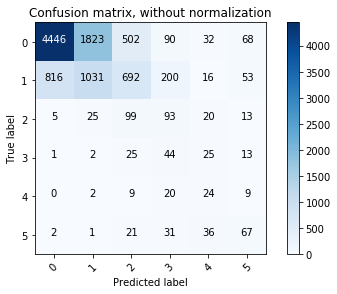

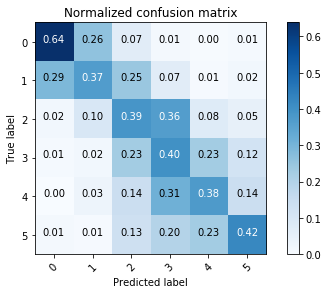

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(6),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(6), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Mean accuracy per class")
print(np.mean(np.diag(cm)))

Mean accuracy per class
0.432192084202


In [18]:
upper = np.diag(cm, 1)
upper = np.append(upper, 0)
diagonal = np.diag(cm)
lower = np.diag(cm, -1)
lower = np.append(0, lower)

arr = np.vstack((upper, diagonal, lower))
print("Mean accuracy in the correct class or +- 1")
print(arr.sum(axis=0).mean())

Mean accuracy in the correct class or +- 1
0.831723475986
